In [28]:
import torch
from typing import Any

In [29]:
kernel_size = 3
net = torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=kernel_size, stride=1, padding=(kernel_size-1)//2)

In [30]:
x = torch.randn(1, 1, 28, 28)
print(x.shape)

torch.Size([1, 1, 28, 28])


In [31]:
y = net(x)
print(y.shape) # The output is halved because we skipped (stride) by 2

torch.Size([1, 16, 28, 28])


In [38]:
class ConvNet(torch.nn.Module):
    def __init__(self, layers = [16, 32, 64], kernel_size = 3, stride = 1) -> None:
        super().__init__()
        cnn_layers = []
        c1 = 1
        for c2 in layers:
            cnn_layers.append(torch.nn.Conv2d(c1, c2, kernel_size, stride, (kernel_size-1)//2))
            cnn_layers.append(torch.nn.ReLU())
            c1 = c2
        cnn_layers.append(torch.nn.Conv2d(c1, 1, kernel_size=1)) # 1x1 convolution
        # cnn_layers.append(torch.nn.AdaptiveAvgPool2d(1)) # Pool everything together and average the outputs
        self.network = torch.nn.Sequential(*cnn_layers)

    def forward(self, x) -> Any:
        return self.network(x)

net = ConvNet(stride=2)
print(net(x).shape)

torch.Size([1, 1, 4, 4])


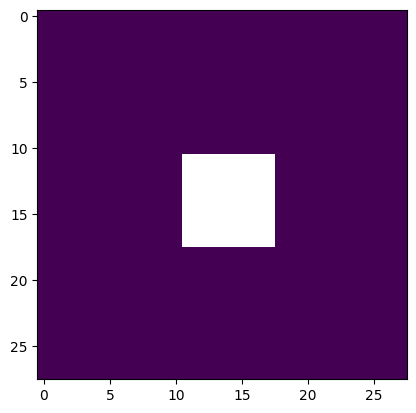

In [46]:
from matplotlib import pyplot as plt

x = torch.randn(1, 1, 28, 28, requires_grad=True)
# x[0, 0, 10, 10] = float('NaN') # This value will infect a bunch of convolutions around it. This is not the same as the receptive field
net = ConvNet(stride=1)
y = net(x)
z = y.new_zeros(y.shape)
z[0, 0, z.shape[2]//2, z.shape[3]//2] = float('NaN')
(y * z).sum().backward()
plt.imshow(x.grad[0, 0].detach().numpy())